In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%config InlineBackend.figure_format='retina'

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
kernel0 = np.array([[0,1,0], [0, -2, 0], [0, 1, 0]]) # y-edge detection
kernel1 = np.array([[1,1,1], [1, -8, 1], [1,1,1]]) # xy-edge detection
kernel2 = np.array([[1,1,1], [1, 1, 1], [1,1,1]]) # Box Blur
kernel3 = np.array([[-1,-1,0], [-1, 0, 1], [0,1,1]]) # Emboss
kernel4 = np.array([[0,-1,0], [-1, 5, -1], [0,-1,0]]) # Sharpen

kernel_list = [('y-edge', kernel0), ('xy-edge', kernel1),
               ('blur', kernel2), ('embos', kernel3), ('sharpen', kernel4)]

In [4]:
def plot_conv_example(images, kernel_list):
    plt.figure(figsize=(10,8))
    for j in range(len(images)):
        img = images[j].reshape(28,28)
        plt.subplot(5,5,1 + 5*j)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title('input {0}'.format(j))
        for k, (name, kernel_in) in enumerate(kernel_list):
            reshaped_images = images[j].reshape(1, 28, 28, 1)
            x = tf.constant(reshaped_images, dtype=tf.float32)
            kernel = tf.constant(kernel_in.reshape([3,3,1,1]), dtype=tf.float32)
            conv_out = tf.nn.conv2d(input=x, filters=kernel, strides=[1,1,1,1], padding='SAME')
            plt.subplot(5,5, 1+k + 5*j)
            plt.imshow(conv_out[0, :, :, 0], cmap='gray')
            plt.axis('off')
            plt.title(name)
    plt.show()

shape of image is (28, 28)


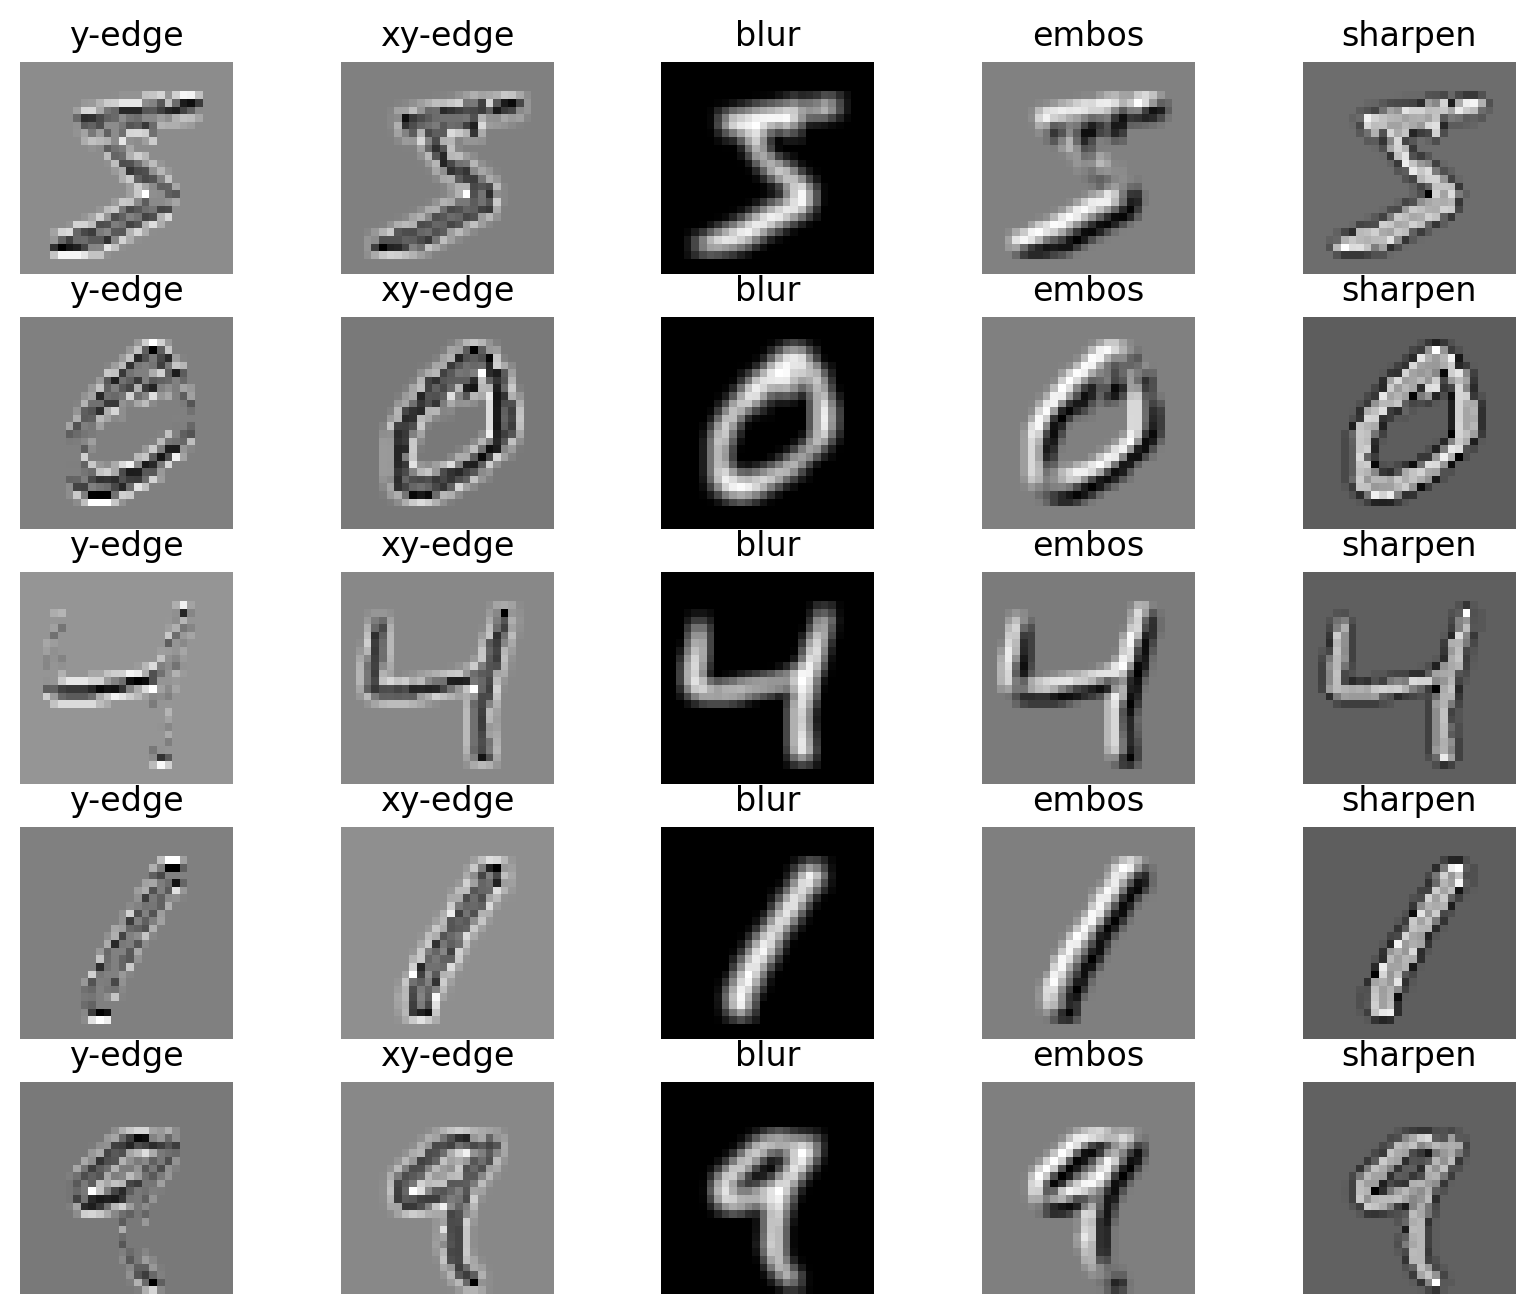

In [5]:
print(f'shape of image is {x_train[0].shape}')
plot_conv_example(x_train[:5], kernel_list)

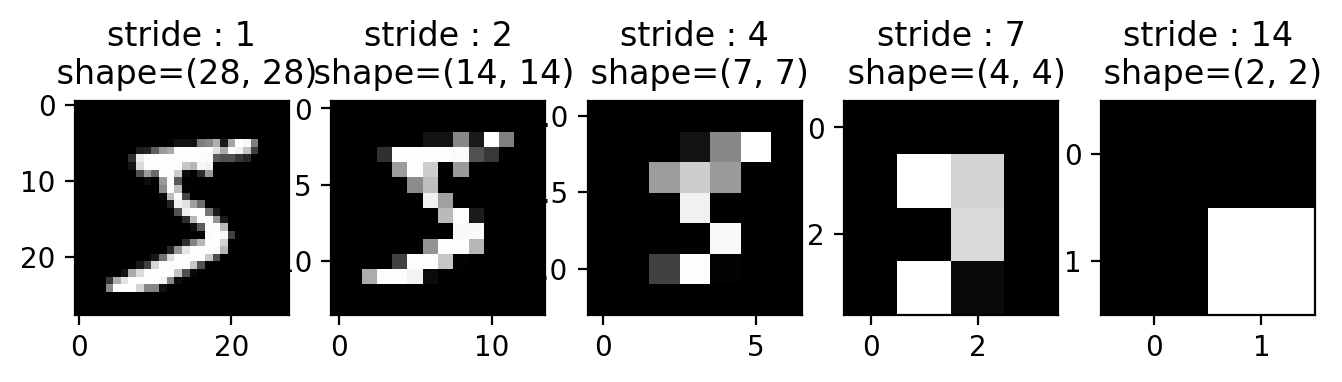

In [6]:
identity_kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
x = tf.constant(x_train[:1].reshape(1, 28, 28, 1), dtype=tf.float32)
kernel = tf.constant(identity_kernel.reshape([3,3,1,1]), dtype=tf.float32)
plt.figure(figsize=(8,8))
for k, stride_num in enumerate([1, 2, 4, 7, 14], 1):
    plt.subplot(1,5,k)
    conv_out = tf.nn.conv2d(input=x, filters=kernel, strides=[1,stride_num,stride_num,1], padding='SAME')
    plt.imshow(conv_out[0, :, :, 0], cmap='gray')
    plt.title('stride : {0}\n shape=({1}, {2})'.format(stride_num, conv_out.shape[1], conv_out.shape[2]))
plt.show()

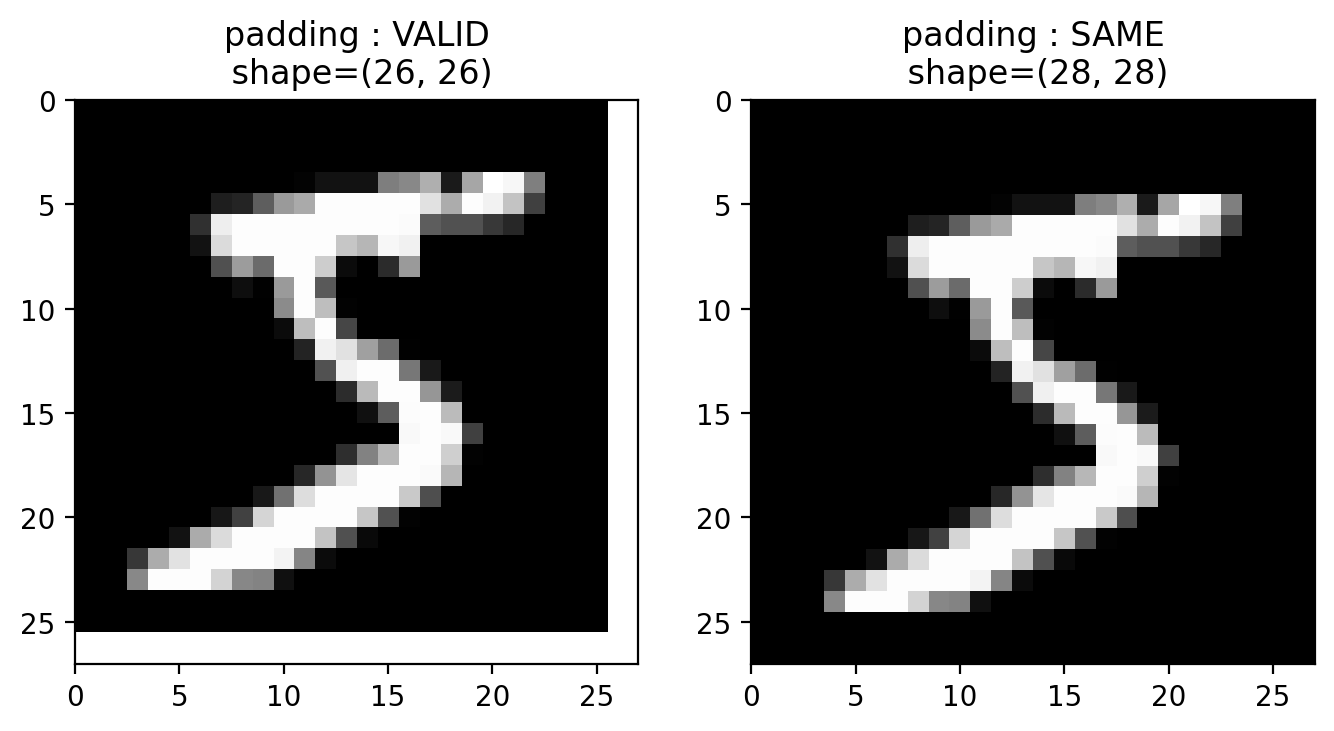

In [7]:
identity_kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
x = tf.constant(x_train[:1].reshape(1, 28, 28, 1), dtype=tf.float32)
kernel = tf.constant(identity_kernel.reshape([3,3,1,1]), dtype=tf.float32)
plt.figure(figsize=(8,8))
for k, padding_style in enumerate(['VALID', 'SAME'], 1):
    plt.subplot(1,2,k)
    conv_out = tf.nn.conv2d(input=x, filters=kernel, strides=[1,1,1,1], padding=padding_style)
    plt.imshow(conv_out[0, :, :, 0], cmap='gray')
    plt.title('padding : {0}\n shape=({1}, {2})'.format(padding_style, conv_out.shape[1], conv_out.shape[2]))
    plt.axis([0,27,27,0])
plt.show()

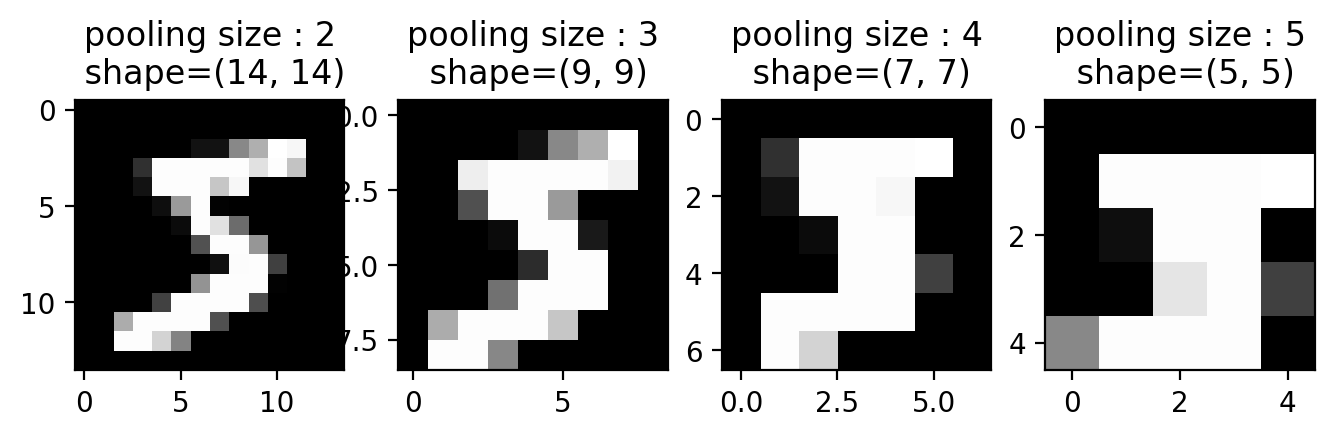

In [8]:
identity_kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
x = tf.constant(x_train[:1].reshape(1, 28, 28, 1), dtype=tf.float32)
kernel = tf.constant(identity_kernel.reshape([3,3,1,1]), dtype=tf.float32)
plt.figure(figsize=(8,8))
for k, pooling_size in enumerate([2,3,4,5], 1):
    plt.subplot(1,4,k)
    out = tf.nn.max_pool2d(x, pooling_size, pooling_size, padding='VALID')
    plt.imshow(out[0, :, :, 0], cmap='gray')
    plt.title('pooling size : {0}\n shape=({1}, {2})'.format(pooling_size, out.shape[1], out.shape[2]))
plt.show()

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
print("="*40)
print("Train Data Shape : {0}".format(x_train.shape))
print("Train Label Shape : {0}".format(y_train.shape))
print("Test Data Shape : {0}".format(x_test.shape))
print("Test Label Shape : {0}".format(y_test.shape))

print("="*40)
for i in range(10):
    print("Train Label {0} : {1}".format(i, np.count_nonzero(y_train == i)))
print("Train Total : {0}".format(len(y_train)))

print("="*40)
for i in range(10):
    print("Test Label {0} : {1}".format(i, np.count_nonzero(y_test == i)))
print("Test Total : {0}".format(len(y_test)))

print("="*40)
print("Train > Min : {0}, Max : {1}".format(x_train.min(), x_train.max()))
print("Test > Min : {0}, Max : {1}".format(x_test.min(), x_test.max()))


Train Data Shape : (60000, 28, 28)
Train Label Shape : (60000,)
Test Data Shape : (10000, 28, 28)
Test Label Shape : (10000,)
Train Label 0 : 5923
Train Label 1 : 6742
Train Label 2 : 5958
Train Label 3 : 6131
Train Label 4 : 5842
Train Label 5 : 5421
Train Label 6 : 5918
Train Label 7 : 6265
Train Label 8 : 5851
Train Label 9 : 5949
Train Total : 60000
Test Label 0 : 980
Test Label 1 : 1135
Test Label 2 : 1032
Test Label 3 : 1010
Test Label 4 : 982
Test Label 5 : 892
Test Label 6 : 958
Test Label 7 : 1028
Test Label 8 : 974
Test Label 9 : 1009
Test Total : 10000
Train > Min : 0.0, Max : 1.0
Test > Min : 0.0, Max : 1.0


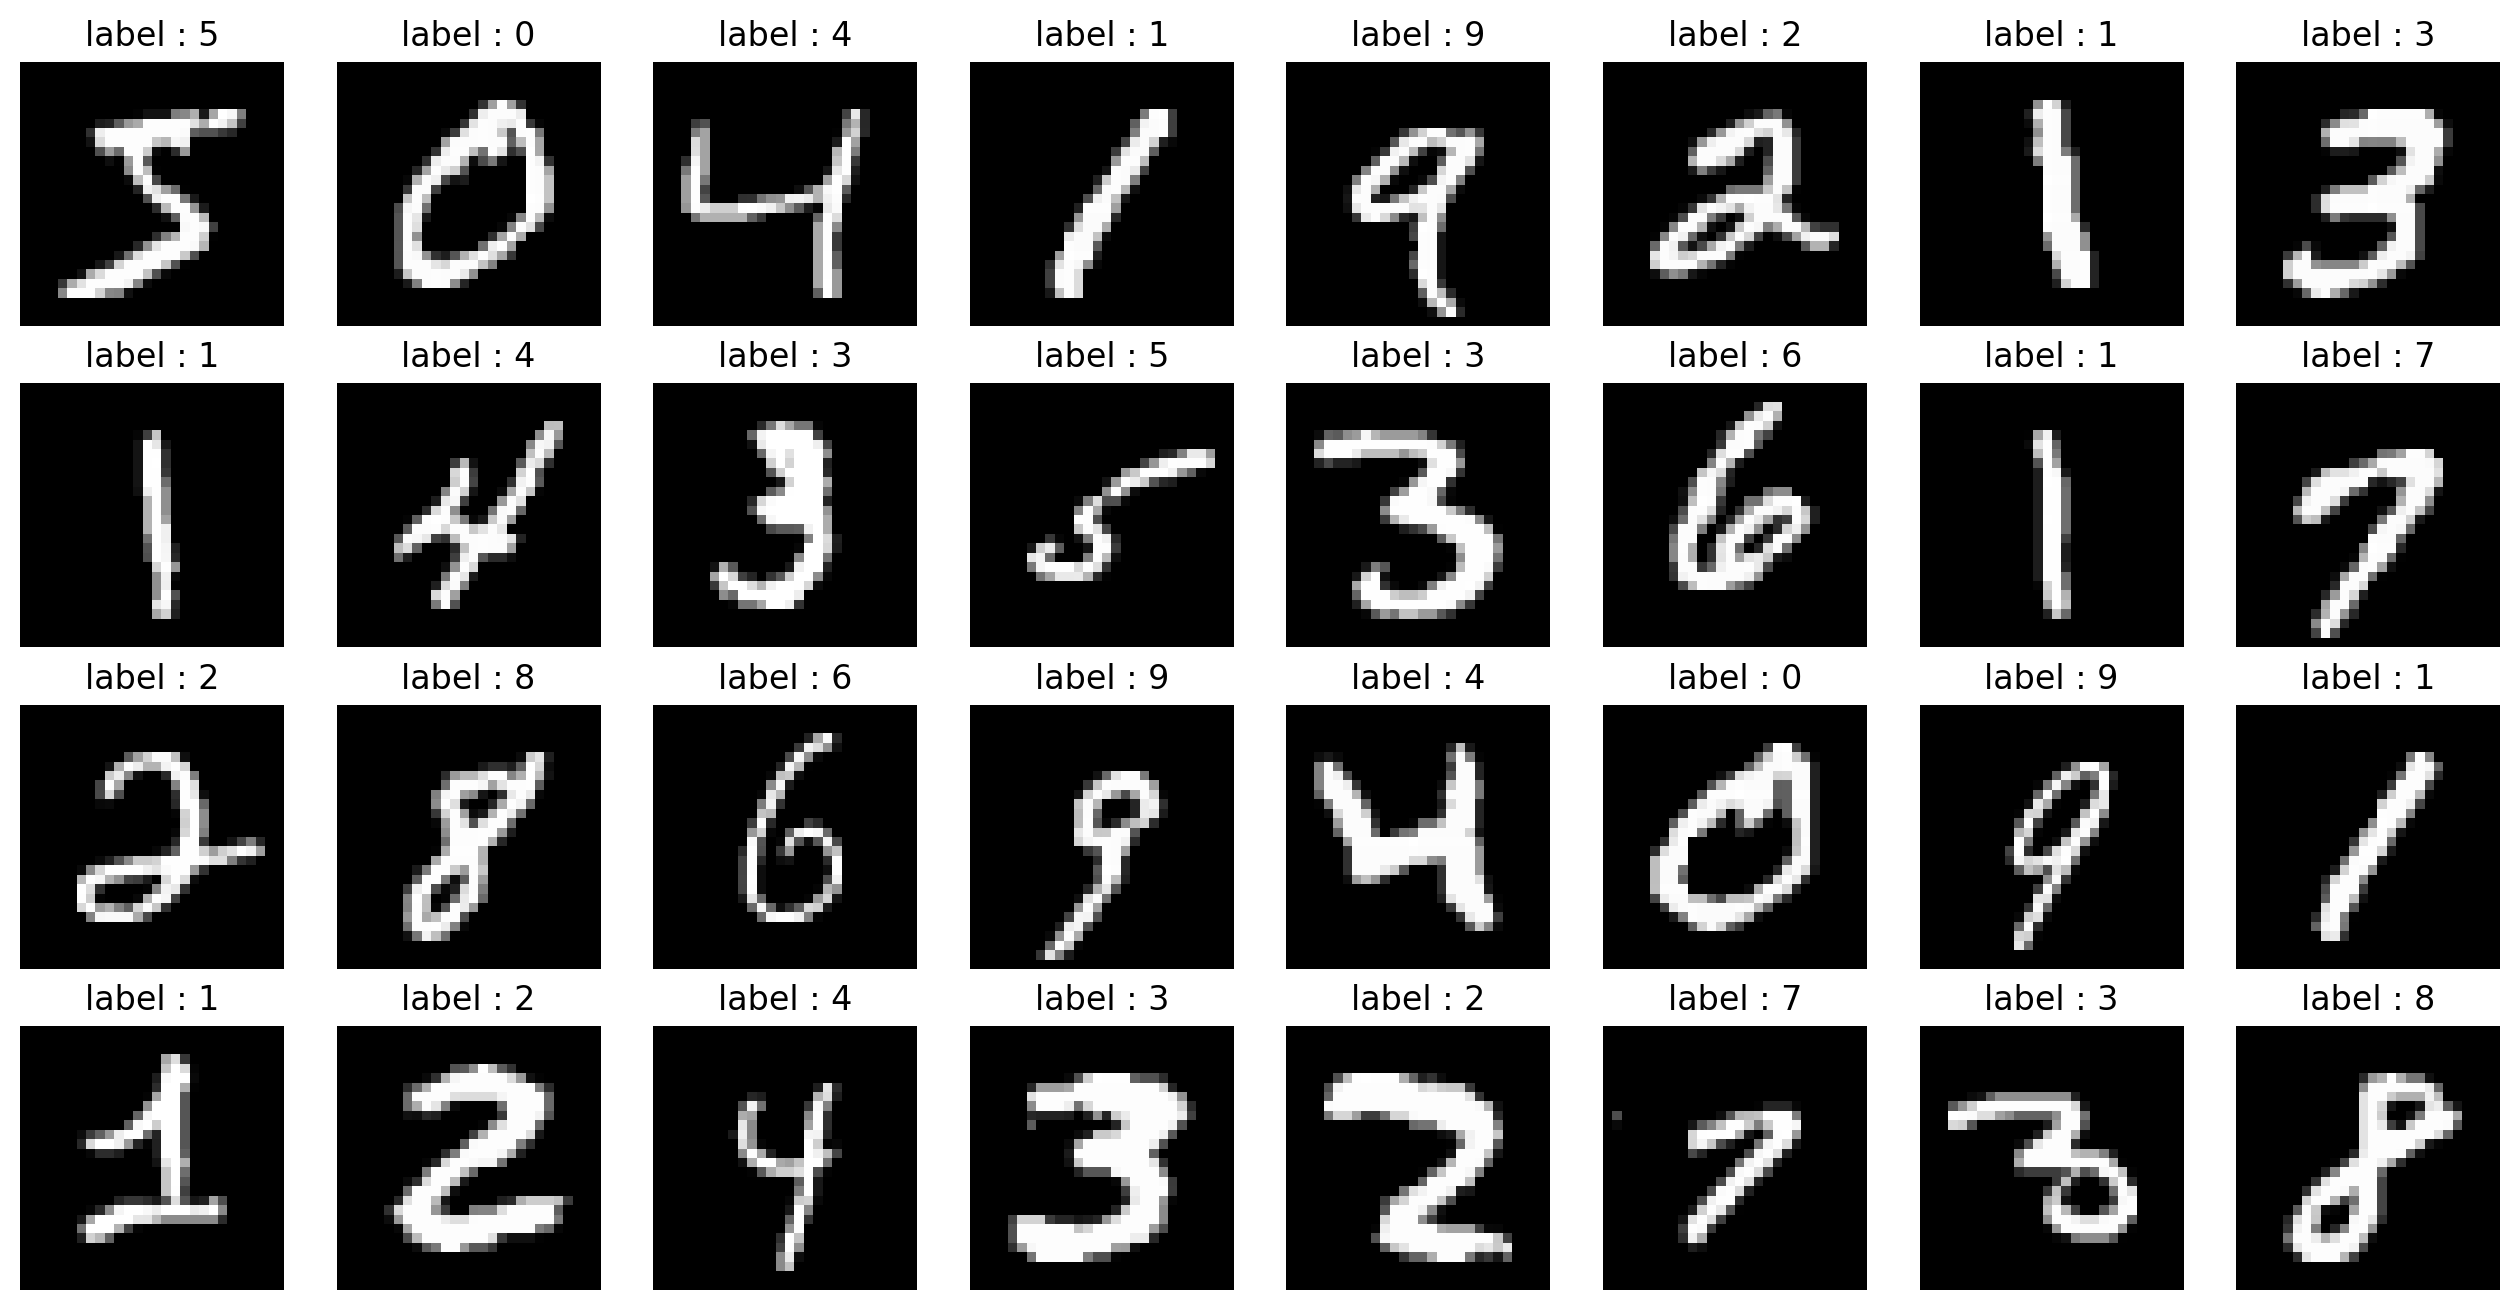

In [11]:
plt.figure(figsize=(16,8))
for k in range(32):
    img = x_train[k]
    label = y_train[k]
    plt.subplot(4,8,1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('label : {0}'.format(label))
plt.show()

In [12]:
print(y_train[:10])
print(tf.keras.utils.to_categorical(y_train[:10]))
print(np.argmax(tf.keras.utils.to_categorical(y_train[:10]), 1))

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4 1 9 2 1 3 1 4]


In [13]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=[28, 28, 1]),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# learning rate를 변경
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [22]:
batch_size = 64
MaxEpoch = 5

model.fit(
    x_train[..., np.newaxis],
    y_train,
    epochs=MaxEpoch,
    batch_size=batch_size,
    validation_split=0.2,
    )

Epoch 1/5
750/750 [==============================] - 14s 18ms/step - loss: 0.0421 - sparse_categorical_accuracy: 0.9866 - val_loss: 0.0314 - val_sparse_categorical_accuracy: 0.9915
Epoch 2/5
750/750 [==============================] - 14s 18ms/step - loss: 0.0387 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.0306 - val_sparse_categorical_accuracy: 0.9917
Epoch 3/5
750/750 [==============================] - 14s 18ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0351 - val_sparse_categorical_accuracy: 0.9920
Epoch 4/5
750/750 [==============================] - 14s 18ms/step - loss: 0.0308 - sparse_categorical_accuracy: 0.9902 - val_loss: 0.0368 - val_sparse_categorical_accuracy: 0.9907
Epoch 5/5
750/750 [==============================] - 14s 18ms/step - loss: 0.0297 - sparse_categorical_accuracy: 0.9911 - val_loss: 0.0322 - val_sparse_categorical_accuracy: 0.9913


1/1 [==============================] - 0s 57ms/step


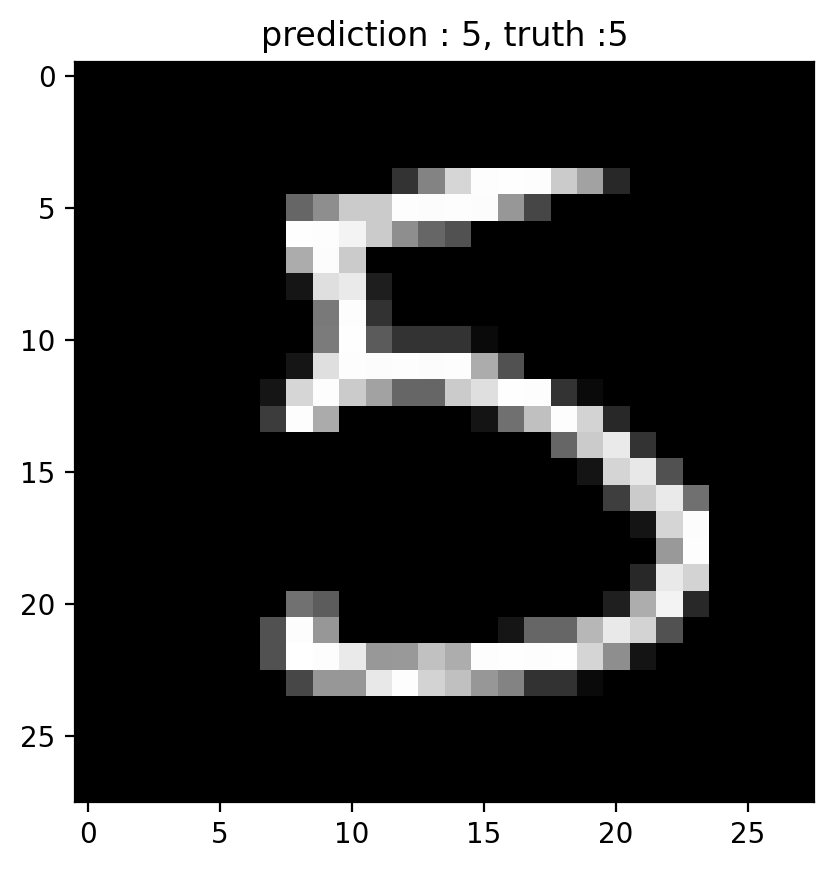

In [17]:
test_index = 15
test_image = x_test[test_index]
test_tensor = test_image[np.newaxis, ..., np.newaxis]
result = model.predict(test_tensor)

plt.imshow(test_image, cmap='gray')
plt.title(f"prediction : {result.argmax()}, truth :{y_test[test_index]}")
plt.show()

In [18]:
[loss, acc] = model.evaluate(x_test[..., np.newaxis],  y_test)
print(f'테스트셋 평가 결과 loss : {loss}, accuracy : {acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0276 - sparse_categorical_accuracy: 0.9907
테스트셋 평가 결과 loss : 0.02760215476155281, accuracy : 0.9907000064849854


In [25]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=[28, 28, 1]),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2304)             

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# learning rate를 변경
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [28]:
batch_size = 64
MaxEpoch = 5

model.fit(
    x_train[..., np.newaxis],
    y_train,
    epochs=MaxEpoch,
    batch_size=batch_size,
    validation_split=0.2,
    )

Epoch 1/5
750/750 [==============================] - 42s 56ms/step - loss: 0.2776 - sparse_categorical_accuracy: 0.9143 - val_loss: 0.0670 - val_sparse_categorical_accuracy: 0.9792
Epoch 2/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0997 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.0508 - val_sparse_categorical_accuracy: 0.9852
Epoch 3/5
750/750 [==============================] - 40s 53ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0.9772 - val_loss: 0.0450 - val_sparse_categorical_accuracy: 0.9874
Epoch 4/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.0410 - val_sparse_categorical_accuracy: 0.9883
Epoch 5/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0571 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0362 - val_sparse_categorical_accuracy: 0.9889


In [ ]:
# Class 를 사용하여 model 구성하는 방법
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import Model

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.max_pool1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='VALID')
        self.conv2 = Conv2D(54, 3, activation='relu')
        self.max_pool2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='VALID')
        self.dropout1 = Dropout(0.25)
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.dropout2 = Dropout(0.5)
        self.d2 = Dense(10, activation="softmax")

    def call(self, x):
        x = self.conv1(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = self.max_pool2(x)
        x = self.dropout1(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.dropout2(x)
        return self.d2(x)

model = MyModel()